In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df_1024 = pd.read_csv("/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/prediction/weseraue/effnet_surface_quality_prediction-weseraue_imgs_1024-20240429_141643.csv")
idx = df_1024.groupby("Image")["Prediction"].idxmax()
df_1024 = df_1024.loc[idx]  

In [54]:
df_2048 = pd.read_csv("/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/prediction/weseraue/effnet_surface_quality_prediction-weseraue_imgs_2048-20240429_071045.csv")
idx = df_2048.groupby("Image")["Prediction"].idxmax()
df_2048 = df_2048.loc[idx]  

In [55]:
df = df_1024.merge(df_2048, on="Image", suffixes=('_1024', '_2048'))

In [56]:
df.Level_0_1024.value_counts()

Level_0_1024
asphalt          1817
unpaved           362
concrete          100
paving_stones      79
sett               42
Name: count, dtype: int64

In [57]:
df.Level_0_2048.value_counts()

Level_0_2048
asphalt          1671
concrete          284
unpaved           275
paving_stones     130
sett               40
Name: count, dtype: int64

In [58]:
len(df[df.Level_0_1024 != df.Level_0_2048]) / len(df)

0.1975

## Direction of travel

In [40]:
points = [[13.4152512, 52.4946467], [13.415371, 52.494627], [13.4154846, 52.4946011], [13.415605, 52.4945674], [13.4157283, 52.4945274]]
x = [point[0] for point in points]
y = [point[1] for point in points]

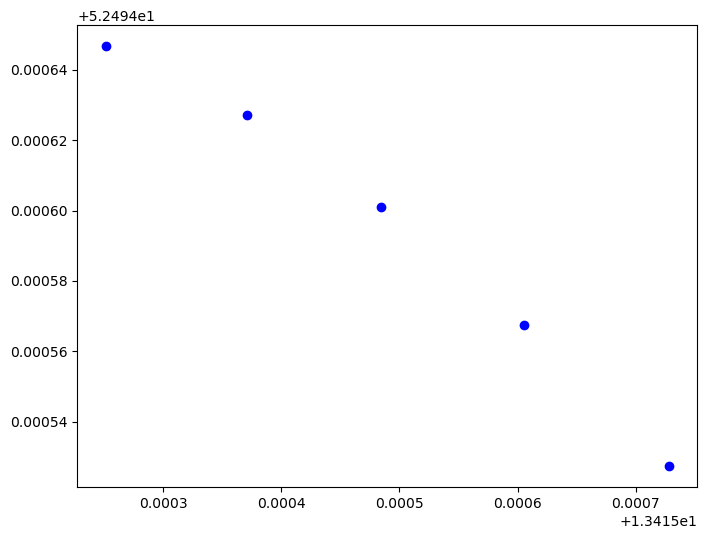

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color='blue', label='Points')

<Axes: >

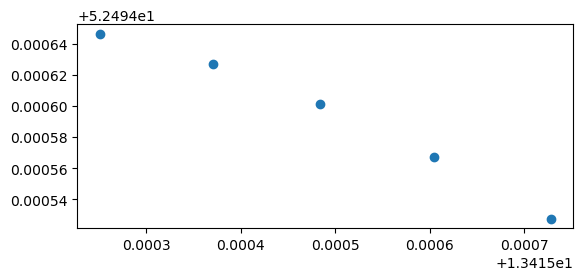

In [26]:
import geopandas as gpd
import numpy as np
gdf = gpd.GeoDataFrame({"seq": list(range(0, len(x)))}, geometry=gpd.points_from_xy(x, y), crs='EPSG:4326')

gdf.plot()

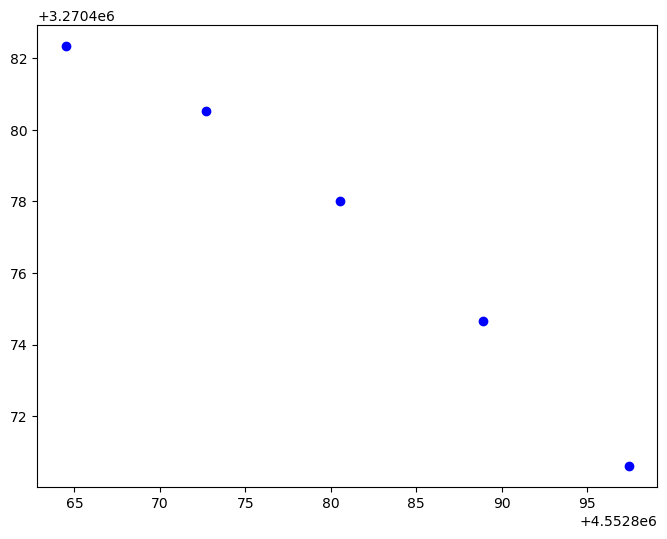

In [27]:
coords = gdf.to_crs(3035).get_coordinates()
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(coords["x"], coords["y"], color='blue', label='Points')

In [42]:
# Fit a linear regression line
slope, intercept = np.polyfit(x, y, 1)
# Compute the angle of the line in radians
angle = np.arctan(slope)
# Convert the angle to angle in degrees 
degrees = np.degrees(angle)
# Convert to compass angle
compass_angle = 90 - degrees

f"slope: {slope}, intercept: {intercept}, angle: {angle}, degrees: {degrees}, compass_angle: {compass_angle}"

'slope: -0.2512655100312911, intercept: 55.86544335966396, angle: -0.24616937627355032, degrees: -14.104466305842339, compass_angle: 104.10446630584234'

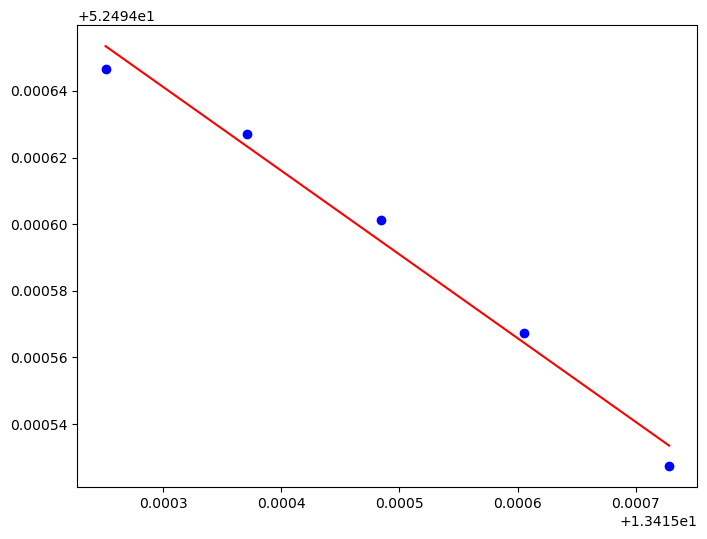

In [50]:
# Fit a line (linear regression) to the data
poly_function = np.poly1d([slope, intercept])

# Generate y values for the fitted line
fitted_y = poly_function(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color='blue', label='Points')
ax.plot(x, fitted_y, color='red', label='Fitted Line')

In [37]:
# Fit a linear regression line
slope, intercept = np.polyfit(coords["x"], coords["y"], 1)
# Compute the angle of the line in radians
angle = np.arctan(slope)
# Convert the angle to angle in degrees 
degrees = np.degrees(angle)
# Convert to compass angle
compass_angle = 90 - degrees

# mind the direction
# if right to left, then + 180
if (x[0] > x[-1]):
    compass_angle += 180
f"slope: {slope}, intercept: {intercept}, angle: {angle}, degrees: {degrees}, compass_angle: {compass_angle}"

'slope: -0.3579767817325955, intercept: 4900302.856362749, angle: -0.3437633342120887, degrees: -19.696188201697865, compass_angle: 109.69618820169786'

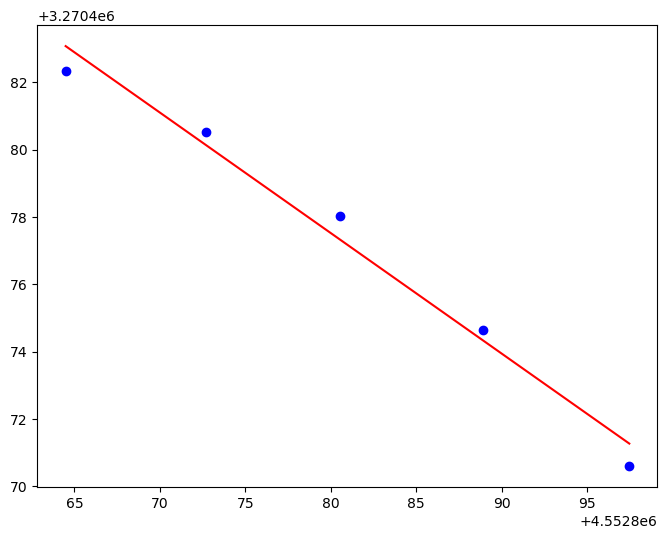

In [38]:
# Fit a line (linear regression) to the data
poly_function = np.poly1d([slope, intercept])

# Generate y values for the fitted line
fitted_y = poly_function(coords["x"])

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(coords["x"], coords["y"], color='blue', label='Points')
ax.plot(coords["x"], fitted_y, color='red', label='Fitted Line')

In [51]:
import geopandas as gpd